In [1]:
#standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#getting data
data=pd.read_csv("heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x=data.drop("target",axis=1)
y=data["target"]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
#split to training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [6]:
#making every thing numerical
#here we have everything numerical hence import another dataset

In [7]:
car=pd.read_csv("car-sales-extended.csv")
car.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [8]:
len(car)

1000

In [9]:
car.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [10]:
#turn categories to numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

features=[]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,features)],remainder="passthrough")
trans_x=transformer.fit_transform(x)

In [11]:
pd.DataFrame(trans_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0


In [12]:
dummies=pd.get_dummies(car[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [13]:
#split the data
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(trans_x,y,test_size=0.2)

In [14]:
#build the model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5106393318965518

In [15]:
miss=pd.read_csv("car-sales-extended-missing-data.csv")
miss

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [16]:
miss.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [17]:
#create x and y
x=miss.drop("Price",axis=1)
y=miss["Price"]

In [18]:
#turn categories to numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,features)],remainder="passthrough")
trans_x=transformer.fit_transform(x)

In [19]:
#split the data
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(trans_x,y,test_size=0.2)

In [20]:
miss

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [21]:
miss["Price"].isna().sum()

50

#### option 1: Fill data with pandas

In [22]:
miss["Make"].fillna("missing",inplace=True)
miss["Colour"].fillna("missing",inplace=True)
miss["Odometer (KM)"].fillna(miss["Odometer (KM)"].mean(),inplace=True)
miss["Doors"].fillna(4,inplace=True)

In [23]:
miss.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

#### price is the column we will be predicting hence removing the missing values

In [24]:
miss.dropna(inplace=True)

In [25]:
miss.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [26]:
x=miss.drop("Price",axis=1)
y=miss["Price"]

In [27]:
#turn categories to numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,features)],remainder="passthrough")
trans_x=transformer.fit_transform(miss)
trans_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### option 2: fill missing values using scikit-learn

In [28]:
miss=pd.read_csv("car-sales-extended-missing-data.csv")
miss.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [29]:
miss.dropna(subset=["Price"],inplace=True)
miss.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [30]:
x=miss.drop("Price",axis=1)
y=miss["Price"]

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill str values with missing and numeric values with mean
cat=SimpleImputer(strategy="constant", fill_value="missing")
door=SimpleImputer(strategy="constant", fill_value=4)
num=SimpleImputer(strategy="mean")
cati=["Make","Colour"]
doori=["Doors"]
numi=["Odometer (KM)"]
imputer=ColumnTransformer([
    ("cat_imputer",cat,cati),
    ("door_imputer",door,doori),
    ("num_imputer",num,numi)])
filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [32]:
miss.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [33]:
fill=pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])
fill

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [34]:
fill.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [35]:
#turn categories to numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,features)],remainder="passthrough")
trans_x=transformer.fit_transform(fill)
trans_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [36]:
#split the data
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(trans_x,y,test_size=0.2)
#build the model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

In [37]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [38]:
fd=pd.DataFrame(housing["data"],columns=housing["feature_names"])
fd

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [39]:
fd["target"]=housing["target"]
fd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [40]:
from sklearn.linear_model import Ridge
np.random.seed(42)

x=fd.drop("target",axis=1)
y=fd["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.5758549611440127

### Lets try the ensemble model

In [41]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=fd.drop("target",axis=1)
y=fd["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8065734772187598

# choosing model for classification

In [42]:
heart=pd.read_csv("heart-disease.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Trying linear SVC

In [43]:
from sklearn.svm import LinearSVC
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=LinearSVC()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8688524590163934

 #### Trying the ensemble random forest 

In [44]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

TIP: 
1. If you have structured data, use ensemble methods
2. If you have unstructured data, use deep learning or transfer learning
3. `x` = features,features variables, data
4. `y` = labels, targets, target variables

### use a trained model to make predictions
2 ways to predict:
1. `predict()`
2. `predict_proba()`

In [45]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
#compare the predictions to truth values
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [47]:
clf.score(x_test,y_test)

0.8524590163934426

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [49]:
#make predictions with predict_proba()
clf.predict_proba(x_test[:5])

#this data is like ([0,1]) -< indices of the array

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [50]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

## use predict proba if you have more sample values like here we have only two

In [51]:
heart["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

### `predict()` can also be used in regression models

In [52]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=fd.drop("target",axis=1)
y=fd["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)

In [53]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [54]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [55]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

# Evaluating a machine learning model
 Three ways to evaluate models/estimators
 1. Estimator's built-in `score()` method
 2. The `scoring` parameter
 3. Problem-specific metric functions

### Evaluate a model with the `score()` method

In [56]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
model.score(x_train,y_train)

1.0

In [58]:
model.score(x_test,y_test)

0.8524590163934426

In [59]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=fd.drop("target",axis=1)
y=fd["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [60]:
model.score(x_train,y_train)

0.9736801960414609

In [61]:
model.score(x_test,y_test)

0.8065734772187598

### Evaluating a model using the `scoring` parameter

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
model.score(x_test,y_test)

0.8524590163934426

In [64]:
cross_val_score(model,x,y,cv=10) #it tests the 20% test dataset to be different everytime

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [65]:
np.random.seed(42)

#Single score split
single=model.score(x_test,y_test)

#Mean of 5-fold 
multi=np.mean(cross_val_score(model,x,y,cv=5))

#compare
single, multi

(0.8524590163934426, 0.8248087431693989)

In [66]:
cross_val_score(model,x,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### <b>Classification model evaluation metrics</b>
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestClassifier()
model.fit(x_train,y_train)
cross_val_score(model,x,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

**Area under the receiver operating characteristic curve (AUC/ROC)**

ROC curves are a comparison of a model's true positive rate (tpr) versus models false positive rate (fpr).

* true positive- model predicts 1 when truth is 1.
* false positive- model predicts 1 when truth is 0.
* true negative- model predicts 0 when truth is 0.
* false negative- model predicts 0 when truth is 1.

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [69]:
from sklearn.metrics import roc_curve
model.fit(x_train,y_train)
y_probs=model.predict_proba(x_test)
y_probs[:10]

array([[0.92, 0.08],
       [0.15, 0.85],
       [0.17, 0.83],
       [0.15, 0.85],
       [0.14, 0.86],
       [0.05, 0.95],
       [0.29, 0.71],
       [0.82, 0.18],
       [0.44, 0.56],
       [0.04, 0.96]])

In [70]:
y_positive=y_probs[:,1]
y_positive[:10]

array([0.08, 0.85, 0.83, 0.85, 0.86, 0.95, 0.71, 0.18, 0.56, 0.96])

In [71]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_positive)

fpr

array([0.        , 0.03846154, 0.03846154, 0.03846154, 0.03846154,
       0.03846154, 0.03846154, 0.07692308, 0.11538462, 0.11538462,
       0.11538462, 0.15384615, 0.15384615, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.30769231, 0.30769231,
       0.38461538, 0.38461538, 0.5       , 0.5       , 0.53846154,
       0.65384615, 0.73076923, 0.76923077, 0.80769231, 0.96153846,
       1.        ])

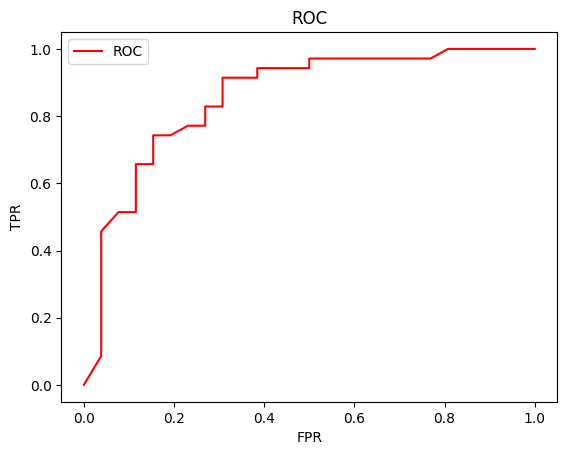

In [72]:
#plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the fpr and tpr of a model.
    """
    plt.plot(fpr,tpr,color="red",label="ROC")
    #plt.plot([0,1],[0,1],color="darkgreen",linestyle="--",label="Guessing")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [73]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_positive)

0.8554945054945055

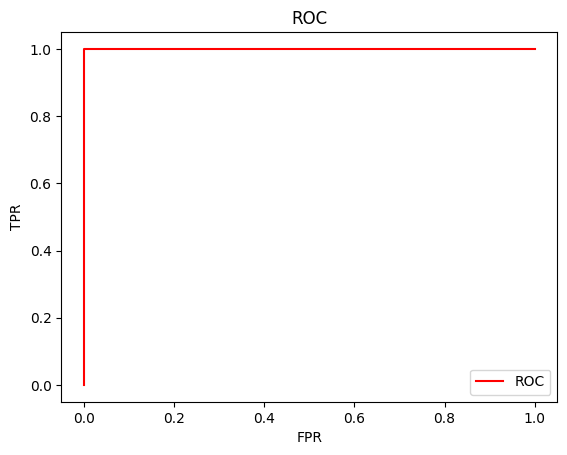

In [74]:
# plot perfect ROC curve
fpr, tpr, thresholds= roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [75]:
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

In [76]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[25,  1],
       [ 3, 32]], dtype=int64)

In [77]:
#visualization 
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,25,1
1,3,32


In [78]:
25+1+3+32

61

In [79]:
len(y_preds)

61

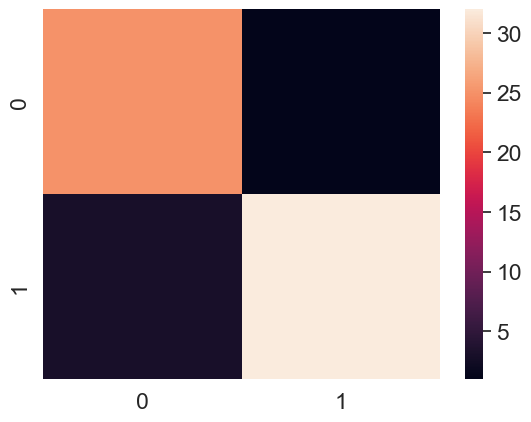

In [80]:
#Make visual using seaborn's heatmap()
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat);

**Confusion Matrix** to evaluate classification model.

In [81]:
from sklearn.metrics import confusion_matrix
y_preds=model.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[19,  7],
       [ 6, 29]], dtype=int64)

In [82]:
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,19,7
1,6,29


In [83]:
import sklearn 
sklearn.__version__

'1.5.0'

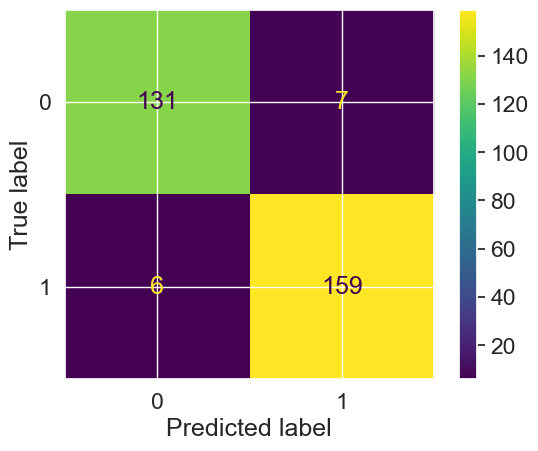

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=model,X=x,y=y)

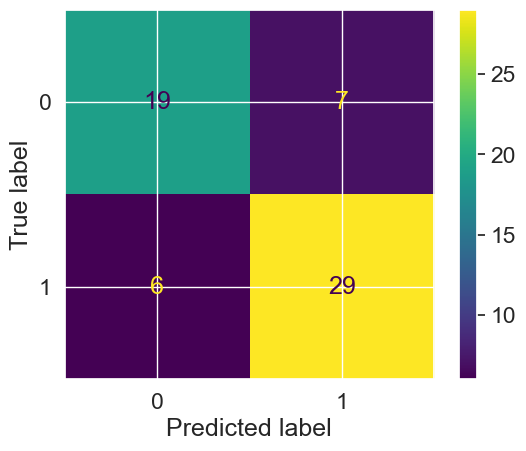

In [85]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds);

**Classification Report**

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.81      0.83      0.82        35

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



**Precision**: Proportions of positive identifications, No false positive is Precision 1.
<br>
**Recall**: Proportions os actual positives correctly classified, No False positives is recall 1.
<br>
**F1 score**: combo of recall and precision.
<br>
**Support**: No of samples each metric was calculated on.
<br>
**Accuracy**: Accuracy of the model.
<br>
**Macro Avg**: Avg of recall, precision and F1 score between classes.(Pay attention if there is a class imbalance)
<br>
**Weighted Avg**: metric is calculated wrt no of samples in each class.Avg of recall, precision and F1 score between classes.

In [178]:
#eg where precision and recall is essential
disease=np.zeros(10000)
disease[0]=1 # one positive case
Preds=np.zeros(10000) # predicts 0 in every case
pd.DataFrame(classification_report(disease,Preds,output_dict=True, zero_division=0.0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### Regression model evaluation metrics

**Points**
1. R^2 (coefficient of determination)
2. Mean Absolute Error (MAE)
4. Mean Squared Error (MSE)

**R2**

In [88]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=fd.drop("target",axis=1)
y=fd["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8065734772187598

In [89]:
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_test),y_test.mean())

In [90]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [91]:
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

In [92]:
r2_score(y_true=y_test,y_pred=y_test)

1.0

**MAE**: Tells how wrong your model predictions are.

In [93]:
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

0.32659871732073664

In [94]:
df=pd.DataFrame(data={"actual value":y_test,"predicted value":y_preds})
df["Differences"]=df["predicted value"] - df["actual value"]
df.head(10)

,actual value,predicted value,Differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [95]:
np.abs(df["Differences"]).mean()

0.32659871732073664

**MSE**

In [96]:
from sklearn.metrics import mean_squared_error
y_preds=model.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse

0.2534678520824551

In [97]:
df["Squared_Differences"]=np.square(df["Differences"])
df.head()

,actual value,predicted value,Differences,Squared_Differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [98]:
df["Squared_Differences"].mean()

0.2534678520824551

In [99]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Scoring parameter**

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]
clf=RandomForestClassifier()

In [101]:
np.random.seed(42)
cv_acc=cross_val_score(clf,x,y,cv=5,scoring=None) # if scoring is none then estimatoor default scoring is used which is accuracy for classification

cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [102]:
print(f"The cross-validated accurary is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accurary is: 82.48%


In [103]:
np.random.seed(42)
cv_prec=cross_val_score(clf,x,y,cv=5,scoring="precision")

cv_prec

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [104]:
print(f"The cross-validated precision is: {np.mean(cv_prec)}")

The cross-validated precision is: 0.8329547346025924


In [105]:
np.random.seed(42)
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")

cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [106]:
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=fd.drop("target",axis=1)
y=fd["target"]
model=RandomForestRegressor()

In [108]:
np.random.seed(42)
cv_r2=cross_val_score(model,x,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [109]:
np.random.seed(42)
cv_mse=cross_val_score(model,x,y,cv=3,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.46141356443710196

In [110]:
np.random.seed(42)
cv_mae=cross_val_score(model,x,y,cv=3,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4835773816036823

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
x=heart.drop("target",axis=1)
y=heart["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestClassifier()

model.fit(x_train,y_train)

y_preds=model.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")

Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [112]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
x=fd.drop("target",axis=1)
y=fd["target"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor()

model.fit(x_train,y_train)

y_preds=model.predict(x_test)

print(f"r2_score: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

r2_score: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


<hr>

## Improving a model

**Hyperparameters vs Parameters**
* Parameters= model find these patterns in data
* Hyperparameters= settings on a model you can adjust to improve its ability to find patterns

In [113]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [114]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<hr>

**Three waysto adjust hyperparameters:**
1. By hand
2. Randomly with RandomSearchCV
3. Echaustively with GridSearchCV

**1. Tuning by hand**
<br>
Hyperparameters is on the validation split. (like a practice exam)

We are going to try and adjust:
1. `max_depth`
2. `max_features`
3. `min_samples_leaf`
4. `min_samples_split`
5. `n_estimators`

In [115]:
def evaluate_pred(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels on a classification
    """
    accuracy= accuracy_score(y_true,y_preds)
    precision= precision_score(y_true,y_preds)
    recall= recall_score(y_true,y_preds)
    f1= f1_score(y_true,y_preds)
    metric_dict= {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")

    return metric_dict

In [116]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_shuf=heart.sample(frac=1) # shuffle the data
x=heart_shuf.drop("target",axis=1)
y=heart_shuf["target"]

train_split=round(0.7*len(heart_shuf))
valid_split=round(train_split+0.15*len(heart_shuf))
x_train,y_train=x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[valid_split:]

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_preds=clf.predict(x_valid)
baseline_metrics= evaluate_pred(y_valid,y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [117]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning with RandomizedSearchCV

In [173]:
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":[10,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],
      "max_features":["log2","sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}

np.random.seed(42)
x=heart_shuf.drop("target",axis=1)
y=heart_shuf["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1) # 1 means all of it
rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10,
                          cv=5,
                          verbose=2)
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [119]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

### Tuning with GridSearchCV

In [120]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [174]:
grid_2={'n_estimators': [100, 200, 500],
        'max_depth': [None],
        'max_features': ['log2', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}

In [175]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)
x=heart_shuf.drop("target",axis=1)
y=heart_shuf["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1) # 1 means all of it
gs_clf=GridSearchCV(estimator=clf,
                    param_grid=grid_2,
                    cv=5,
                    verbose=2)
gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=6, 

In [123]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [124]:
gs_y_preds=gs_clf.predict(x_test)
gs_metrics=evaluate_pred(y_test,gs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


### Saving and loading trained machine learning models

There are two ways to save and load models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [126]:
import pickle
pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))

In [127]:
# Loading a file
loaded_file=pickle.load(open("gs_random_forest_model_1.pkl","rb"))

In [128]:
pickle_y_preds=loaded_file.predict(x_test)
evaluate_pred(y_test,pickle_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**Joblib**

In [129]:
from joblib import dump,load
dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [130]:
loaded_file=load(filename="gs_random_forest_model_1.joblib")

In [132]:
pickle_y_preds=loaded_file.predict(x_test)
evaluate_pred(y_test,pickle_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

# Putting all Together

In [133]:
data=pd.read_csv("car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [134]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [136]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [171]:
# for getting data ready
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# for modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# random seed
np.random.seed(42)

# import data and drop rows with missing labels
data=pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

# define different features and transformer pipeline
categorical_features=["Make","Colour"]
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))])
door_feature=["Doors"]
door_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))])
numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))])

# setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor=ColumnTransformer(transformers=[
    ("cat",categorical_transformer,categorical_features),
    ("door",door_transformer,door_feature),
    ("num",numeric_transformer,numeric_features)
])

# creating a preprocessing and modelling pipeline
model=Pipeline(steps=[("preprocessor",preprocessor),
                       ("model",RandomForestRegressor())])

# split data
x=data.drop("Price",axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# fit and score the model
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22188417408787875

#### It is possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`